In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from swdb_2018_neuropixels.ephys_nwb_adapter import NWB_adapter  
drive_path = '/data/dynamic-brain-workshop/visual_coding_neuropixels'
# import allensdk.brain_observatory.stimulus_info as si
# from allensdk.core.brain_observatory_cache import BrainObservatoryCache
# boc =  BrainObservatoryCache()

In [2]:
manifest_file = os.path.join(drive_path,'ephys_manifest.csv')
expt_info_df = pd.read_csv(manifest_file)
multi_probe_expt_info = expt_info_df[expt_info_df.experiment_type == 'multi_probe']
multi_probe_filename = 'ephys_multi_58.nwb'
nwb_file = os.path.join(drive_path,multi_probe_filename)
data_set = NWB_adapter(nwb_file)

In [3]:
stim_table = data_set.stim_tables['drifting_gratings']
# data_set.stim_tables['natural_movie_one']
stim_table
# print stim_table['orientation'].unique()

,start,end,temporal_frequency,spatial_frequency,orientation
0,1591.12067,1593.12137,2.0,0.04,315.0
1,1594.12319,1596.12395,4.0,0.04,135.0
2,1597.12589,1599.12625,15.0,0.04,225.0
3,1600.12868,1602.12863,4.0,0.04,270.0
4,1603.13079,1605.13106,4.0,0.04,90.0
5,1606.13363,1608.13346,4.0,0.04,315.0
6,1609.13563,1611.13631,15.0,0.04,180.0
7,1612.13908,1614.13857,2.0,0.04,0.0
8,1615.14082,1617.14092,15.0,0.04,180.0
9,1618.14355,1620.14388,15.0,0.04,135.0


In [4]:
def get_data_at_time(time, stim_table):
    starts = stim_table.start.values
    idx = np.searchsorted(starts, time)-1
    if time<stim_table.end.values[idx]:
        return(stim_table.iloc[idx].values[2:5])
    else:
        return np.array([np.nan]*3)

def get_stim_time_array(stim_table, tns_start, tns_end, bin_len):
    T = int(np.floor((tns_end - tns_start)/bin_len))
    time_array = np.linspace(tns_start,tns_end,T)
    stim_array = []
    for time_point in time_array:
        stim_data = get_data_at_time(time_point, stim_table)
        stim_array.append(np.nan_to_num(stim_data+1)-1)
    stim_array = np.array(stim_array).T
    stim_array[1,:]*=100
    stim_array = stim_array.astype(int)
    return(stim_array, time_array)

  
# bin_len = 0.01
bin_len = 0.002
num_stim_rows = 627 #17999
tns_start = stim_table.iloc[0].values[0]
tns_end = stim_table.iloc[num_stim_rows].values[1]
[stim_array, time_array] = get_stim_time_array(stim_table,tns_start,tns_end,bin_len)
print (tns_end-tns_start)/bin_len, time_array.shape, stim_array.shape


1903088.6150000005 (1903088,) (3, 1903088)


In [5]:
def bin_spikes(data_set,bin_len,t_start,t_final,probes=None,regions=None):
    if probes is None:
        probes = data_set.probe_list
    if regions is None:
        regions = data_set.unit_df.structure.unique()
    
    #gather cells from desired regions and probes into cell_table
    use_cells = False
    for probe in probes:
        for region in regions:
            use_cells |= (data_set.unit_df.probe==probe) & (data_set.unit_df.structure==region)
    cell_table = data_set.unit_df[use_cells]
    
    N = len(cell_table)     #number of cells
    T = int(np.floor((t_final-t_start)/bin_len)) #number of time bins
    binned_spikes = np.zeros((N,T)) # binned_spikes[i,j] is the number of spikes from neuron i in time bin j

    #for each cell in the table, add each spike to the appropriate bin
    i = 0
    for z,cell in cell_table.iterrows(): 
        for spike_time in data_set.spike_times[cell['probe']][cell['unit_id']]:
            t = int(np.floor((spike_time-t_start)/bin_len))
            if (t >=0) & (t<T):
                binned_spikes[i,t] += 1
        i+=1    
    return (binned_spikes, cell_table)

(binned_spikes, cell_table) = bin_spikes(data_set,bin_len,tns_start,tns_end,regions=['VISp'])

[  -1 -100   -1]
(3, 1903088) (71, 1903088)


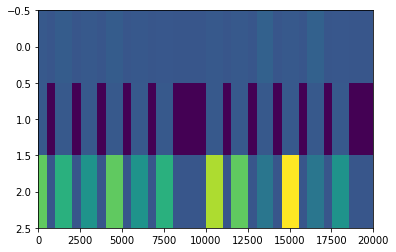

In [6]:
plt.imshow(stim_array[:,50000:70000])
plt.axis('tight')
print stim_array[:,23600]
print stim_array.shape, binned_spikes.shape

In [7]:
print stim_table['orientation'].unique()

[315. 135. 225. 270.  90. 180.   0.  45.  nan]


In [ ]:
from CCmax import *
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

oris = stim_table['orientation'].unique()
oris = oris[np.logical_not(np.isnan(oris))]
freqs = stim_table['temporal_frequency'].unique()
freqs = freqs[np.logical_not(np.isnan(freqs))]
trial_len = 2.0

CCmaxs = np.empty((binned_spikes.shape[0],))
for i in range(binned_spikes.shape[0]):
    maxCCmax = 0
    for ori in oris:
        for freq in freqs:
            trials_table = stim_table[stim_table['orientation']==ori][stim_table['temporal_frequency']==freq]
            trials = len(trials_table)
            bins = int(trial_len/bin_len)
            R = np.empty((trials,bins))
            for trial in range(trials):
                t_start = trials_table.start.values[trial]
                t_start_ind = np.argmin(np.abs(time_array-t_start))+1
                R[trial,:] = binned_spikes[i,t_start_ind:t_start_ind+bins]
            maxCCmax = max(maxCCmax,CCmax(R)[0])
    CCmaxs[i] = maxCCmax
plt.plot(CCmaxs) 

CCmax.py:147: RuntimeWarning: invalid value encountered in double_scalars
  CC_max = np.sqrt(SP/Vy)
CCmax.py:147: RuntimeWarning: invalid value encountered in sqrt
  CC_max = np.sqrt(SP/Vy)


In [ ]:
k = 30
cell_idxs = np.argsort(CCmaxs)
plt.plot(np.sort(CCmaxs))

In [ ]:
np.savez('drifting_gratings_data_2ms',binned_spikes=binned_spikes, stim_array=stim_array, CCmaxs=CCmaxs)